# Análisis exploratorio de datos

Para este análisis se utilizarán datos de viajes de Ford GoBike, primero se descargan del excel como un dataframe:

In [28]:
import pandas as pd
df1 = pd.read_csv("https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv",parse_dates=True)
df2 = pd.read_csv("data/201801-fordgobike-tripdata.csv",parse_dates=True)
df3 = pd.read_csv("data/201802-fordgobike-tripdata.csv",parse_dates=True)
df4 = pd.read_csv("data/201803-fordgobike-tripdata.csv",parse_dates=True)
df5 = pd.read_csv("data/201804-fordgobike-tripdata.csv",parse_dates=True)
df6 = pd.read_csv("data/201805-fordgobike-tripdata.csv",parse_dates=True)
df7 = pd.read_csv("data/201806-fordgobike-tripdata.csv",parse_dates=True)
df8 = pd.read_csv("data/201807-fordgobike-tripdata.csv",parse_dates=True)

df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], axis=0)

C:\Users\Laura\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  # This is added back by InteractiveShellApp.init_path()


Ahora se acceden las observaciones iniciales:

In [2]:
sort = False
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber


A continuación, vamos a determinar algunas características básicas de la base de datos, así como los principales estadísticos de la información, para darnos una idea preliminar de los datos con los que se trabajarán. 

In [72]:
df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            199212, 199213, 199214, 199215, 199216, 199217, 199218, 199219,
            199220, 199221],
           dtype='int64', length=1538086)

In [73]:
df.columns

Index(['bike_id', 'bike_share_for_all_trip', 'duration_sec', 'end_station_id',
       'end_station_latitude', 'end_station_longitude', 'end_station_name',
       'end_time', 'member_birth_year', 'member_gender', 'start_station_id',
       'start_station_latitude', 'start_station_longitude',
       'start_station_name', 'start_time', 'user_type'],
      dtype='object')

In [74]:
df.dtypes

bike_id                      int64
bike_share_for_all_trip     object
duration_sec                 int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name            object
end_time                    object
member_birth_year          float64
member_gender               object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name          object
start_time                  object
user_type                   object
dtype: object

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1538086 entries, 0 to 199221
Data columns (total 16 columns):
bike_id                    1538086 non-null int64
bike_share_for_all_trip    1018386 non-null object
duration_sec               1538086 non-null int64
end_station_id             1532841 non-null float64
end_station_latitude       1538086 non-null float64
end_station_longitude      1538086 non-null float64
end_station_name           1532841 non-null object
end_time                   1538086 non-null object
member_birth_year          1400419 non-null float64
member_gender              1400760 non-null object
start_station_id           1532841 non-null float64
start_station_latitude     1538086 non-null float64
start_station_longitude    1538086 non-null float64
start_station_name         1532841 non-null object
start_time                 1538086 non-null object
user_type                  1538086 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 199.5+ MB


In [76]:
df.describe()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
count,1.538086e+06,1.538086e+06,1.532841e+06,1.538086e+06,1.538086e+06,1.400419e+06,1.532841e+06,1.538086e+06,1.538086e+06
mean,2.020603e+03,9.573795e+02,1.056254e+02,3.776912e+01,-1.223547e+02,1.981805e+03,1.076984e+02,3.776897e+01,-1.223553e+02
std,1.152290e+03,2.891834e+03,9.259640e+01,9.756527e-02,1.517343e-01,1.056463e+01,9.297119e+01,9.766799e-02,1.521276e-01
min,1.000000e+01,6.100000e+01,3.000000e+00,3.728000e+01,-1.224443e+02,1.881000e+03,3.000000e+00,3.731285e+01,-1.224443e+02
25%,1.045000e+03,3.610000e+02,2.700000e+01,3.777241e+01,-1.224103e+02,1.976000e+03,2.800000e+01,3.777179e+01,-1.224117e+02
50%,2.072000e+03,5.690000e+02,7.700000e+01,3.778240e+01,-1.223974e+02,1.984000e+03,7.900000e+01,3.778175e+01,-1.223984e+02
75%,2.952000e+03,8.970000e+02,1.710000e+02,3.779539e+01,-1.223881e+02,1.989000e+03,1.730000e+02,3.779539e+01,-1.223881e+02
max,4.307000e+03,8.636900e+04,3.570000e+02,4.551000e+01,-7.357000e+01,2.000000e+03,3.570000e+02,4.551000e+01,-7.357000e+01


De la información anterior podemos observar que estaremos trabajando con un total de 1 538 086 observaciones y 16 variables o características. Los tipos de variables son bastante diversas, algunas de ellas son numéricas, como la duración en segundos del viaje, la latitud y longitud de la estación de partida y llegada. Sin embargo también contamos con variables categóricas como el género del usuario, el tipo de usuario, si este compartió la misma bicicleta durante todo el viaje **REVISAR**, e incluso de tipo string como el nombre de la estación de salida y llegada. 

Vamos ahora a explorar la distribución de algunas de las variables de la base mediante histogramas. 

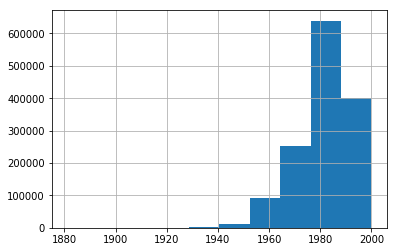

In [23]:
df['member_birth_year'].hist()

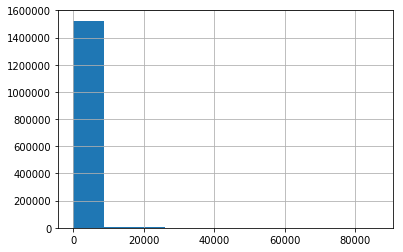

In [24]:
df['duration_sec'].hist()

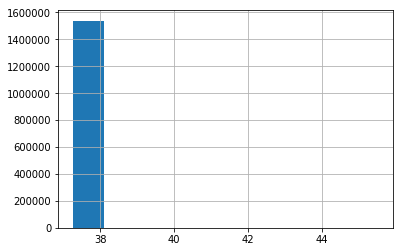

In [25]:
df['end_station_latitude'].hist()

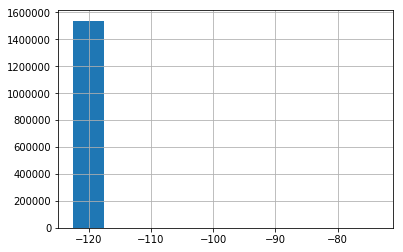

In [20]:
df['end_station_longitude'].hist()

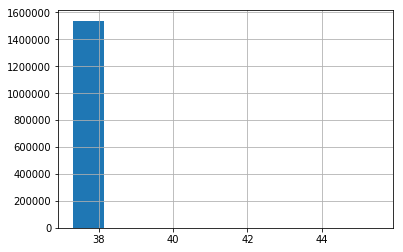

In [21]:
df['start_station_latitude'].hist()

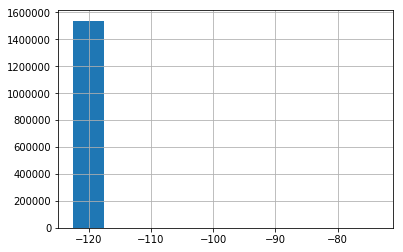

In [22]:
df['start_station_longitude'].hist()

En general se puede observar que la latitud y longitud, tanto de las estaciones iniciales como las de llegada, poseen una distribución bastante asimétrica, pues esta se acumula principalmente a la izquierda. Algo similar sucede con la distribución de la duración en segundos de los viajes, pues en su mayoría se concentran entre 0 y 1000. 

Por otro lado, la información siguiente nos permite observar que los usuarios son en su mayoría hombres y además son más los miembros subscritos que clientes casuales quienes utilizan las bicicletas. Asimismo la mayoría de usuarios no compartieron la bicicleta durante todo el viaje *NO ESTOY SEGURA DE QUÉ SIGNIFICA ESTA ÚLTIMA VARIABLE, REVISAR*.

In [27]:
print(df.groupby("member_gender").size())
print(df.groupby("user_type").size())
print(df.groupby("bike_share_for_all_trip").size())

member_gender
Female     336222
Male      1043512
Other       21026
dtype: int64
user_type
Customer       271263
Subscriber    1266823
dtype: int64
bike_share_for_all_trip
No     934032
Yes     84354
dtype: int64


En las siguientes líneas de código vemos cuál es el máximo y mínimo número de veces que una estación de llegada o salida ha sido visitada por un usuario. Además se crearon unos histogramas que aproximan la distribución de la cantidad de veces que la estación de llegada o salida ha sido visitada, de donde se puede inferir que prácticamente las estaciones de llegada más visitadas son también las estaciones de salida más visitadas por los usuarios. Esta última idea será retomada más adelante con ayuda de algunos gráficos de dispersión. 

In [55]:
df['end_station_id'].value_counts().max()


43013

In [43]:
df['end_station_id'].value_counts().min()


5

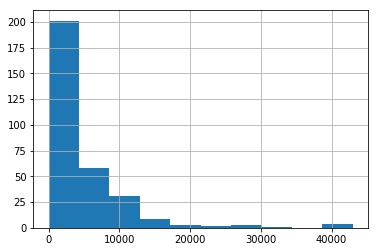

In [56]:
df['end_station_id'].value_counts().hist()

In [44]:
df['start_station_id'].value_counts().max()


37401

In [45]:
df['start_station_id'].value_counts().min()

2

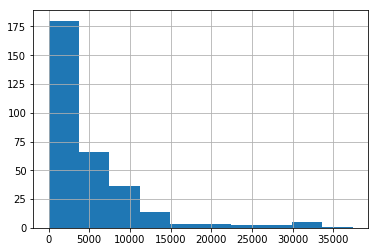

In [57]:
df['start_station_id'].value_counts().hist()

Las distribuciones de las variables también pueden ser aproximadas por medio de boxplots, en donde se pueden observar más fácilmente outliers. Por lo que en los siguientes gráficos se presentan boxplots de las variables de la base de datos. 

957.3794950347379

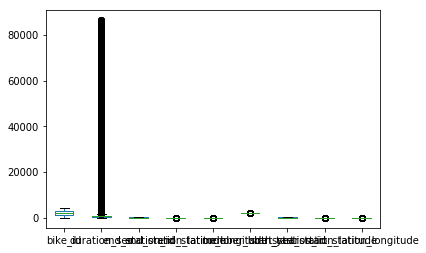

In [67]:
df.plot(kind='box')
df["duration_sec"].mean()

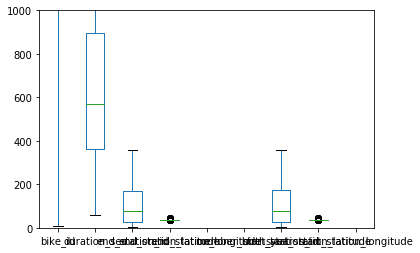

In [66]:
df.plot(kind='box',ylim=[0,1000])

Uno de las características que sobresale de los gráficos anteriores es que existen algunos outliers para la variable duración en segundos del viaje, pues apersa de que la mayoría de las observaciones se encuentran alrededor entre 300 y 1000, e incluso su media es 957,38 segundos, existen observaciones de hasta más de 8000 segundos. 

Finalmente, es importante conocer la relación que existe entre las variables con las que se está trabajando, por lo que se calculó la matriz de correlación entre las variables numéricas.

In [71]:
df.corr()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
bike_id,1.000000,-0.009014,-0.053438,0.020492,-0.064389,0.018801,-0.055265,0.020229,-0.064182
duration_sec,-0.009014,1.000000,-0.004209,0.001224,-0.004224,0.003733,-0.010187,0.000621,-0.003259
end_station_id,-0.053438,-0.004209,1.000000,-0.317472,0.625223,0.106103,0.541569,-0.295858,0.631242
end_station_latitude,0.020492,0.001224,-0.317472,1.000000,-0.477717,-0.074020,-0.292187,0.990668,-0.477264
end_station_longitude,-0.064389,-0.004224,0.625223,-0.477717,1.000000,0.070869,0.616172,-0.476294,0.996212
member_birth_year,0.018801,0.003733,0.106103,-0.074020,0.070869,1.000000,0.107115,-0.073836,0.070216
start_station_id,-0.055265,-0.010187,0.541569,-0.292187,0.616172,0.107115,1.000000,-0.305187,0.613084
start_station_latitude,0.020229,0.000621,-0.295858,0.990668,-0.476294,-0.073836,-0.305187,1.000000,-0.473076
start_station_longitude,-0.064182,-0.003259,0.631242,-0.477264,0.996212,0.070216,0.613084,-0.473076,1.000000


Es fácil observar que la latitud entre las estaciones de salida y llegada de los usuarios tienen una correlación lineal bastante elevada, pues es muy cercana a 1. Lo mismo sucede en el caso de la longitud. Para ilustrar esto se realizó gráficos de dispersión entre las variables en cuestión y es fácil observar la relación mencionada anteriormente, pues en general conforme mayor es la latitud de la estación de salida, mayor es la latitud de la estación de llegada, y lo mismo para la longitud, con una especial concentración en los valores menores.
Esto último se complementa con los histogramas que se observaron anteriormente acerca de la distribución de la latitud y longitud de las estaciones de salida y llegada, pues se observó una acumulación importante en los valores más pequeños. Otra de las ideas que se refuerzan con esta acumulación de puntos, es que las estaciones de salida que más se utilizan son también las estaciones de llegada más utilizadas, como se pudo observar en histogramas anteriores. 
Y finalmente, algo que logra explicar la alta correlación entre la latitud así como la longitud de las estaciones de salida y llegada de cada usuario es que; como ya se señaló, los recorridos tienen en promedio una duración bastante corta, por lo que no es extraño que la estación de llegada de un usuario esté muy cerca de la que salió minutos antes. 


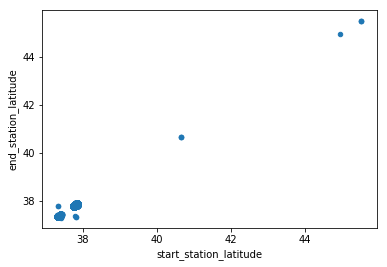

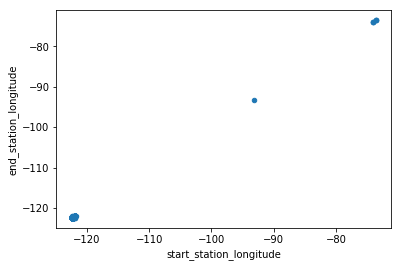

In [69]:
df.plot.scatter(x='start_station_latitude', y='end_station_latitude')
df.plot.scatter(x='start_station_longitude', y='end_station_longitude')